# *Projet P3: Concevez une application au service de la santé publique*






## Analyse

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-whitegrid')
plt.rcParams.update({'font.size': 12})

In [2]:
## mon_fichier = 'donnee/fr.echantillon_pretraitement.csv'
mon_fichier = 'donnee/fr.openfoodfacts.org.products_pretraitement.csv'

In [3]:
data = pd.read_csv(mon_fichier,sep=',', encoding='utf_8', dtype={1:str})

In [4]:
proportion = 100/data.shape[0] ## pour avoir le pourcentage de produits pris en compte

In [5]:
data.shape

(596889, 45)

## Analyse univariée

**Nutriments**

,fat_100g,carbohydrates_100g,proteins_100g,salt_100g,saturated-fat_100g,sugars_100g,fiber_100g
count,596889.000000,596889.000000,596889.000000,596889.000000,575700.000000,588896.000000,306716.000000
mean,14.359607,27.656306,8.254587,0.997626,5.602959,13.681160,2.509654
std,18.902036,28.226124,8.473328,1.796275,8.418934,19.744872,3.922577
min,0.000000,0.000000,0.000000,0.000000,0.000000,-0.100000,-0.417000
25%,0.880000,3.570000,1.500000,0.080000,0.100000,0.770000,0.000000
50%,7.060000,13.750000,5.900000,0.600000,2.000000,4.000000,1.400000
75%,22.000000,53.000000,12.000000,1.332500,8.300000,19.000000,3.300000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


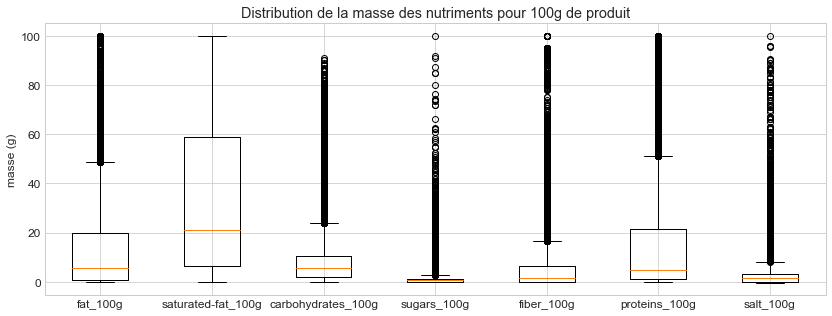

In [6]:
fig = plt.figure(figsize=(14,5))
plt.boxplot(data[['fat_100g','carbohydrates_100g','proteins_100g',
                  'salt_100g','saturated-fat_100g','sugars_100g',
                  'fiber_100g']].dropna(),
           labels=['fat_100g','saturated-fat_100g',
                   'carbohydrates_100g','sugars_100g','fiber_100g',
                   'proteins_100g','salt_100g']);
plt.ylabel('masse (g)'),
plt.title('Distribution de la masse des nutriments pour 100g de produit');
data[['fat_100g','carbohydrates_100g','proteins_100g',
                  'salt_100g','saturated-fat_100g','sugars_100g',
                  'fiber_100g']].describe()

**Energie**

count    596889.000000
mean       1153.435252
std         793.729343
min          10.500000
25%         448.000000
50%        1088.000000
75%        1661.000000
max        3799.000000
Name: energy_100g, dtype: float64

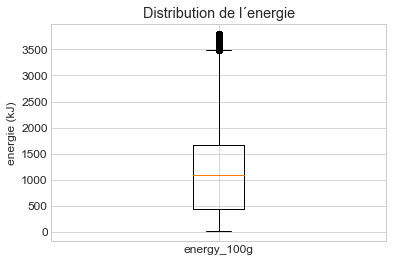

In [7]:
plt.boxplot(data['energy_100g'].dropna(),labels=['energy_100g'])
plt.ylabel('energie (kJ)'),
plt.title('Distribution de l´energie');
data['energy_100g'].describe()

In [8]:
data["pnns_groups_1"].describe()

count            596826
unique               10
top       Sugary snacks
freq             129338
Name: pnns_groups_1, dtype: object

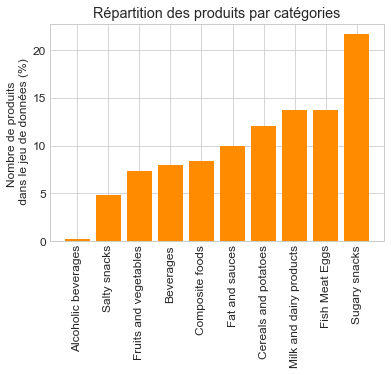

In [9]:
var_categorie = data["pnns_groups_1"].value_counts(ascending=True)*proportion
plt.bar(range(len(var_categorie)),var_categorie,color="darkorange")
plt.xticks(range(len((var_categorie))),var_categorie.index,rotation=90);
plt.title('Répartition des produits par catégories')
plt.ylabel('Nombre de produits \n dans le jeu de données (%)')
plt.rcParams.update({'font.size': 12})

In [10]:
proportion = 100/data.shape[0] ## pour avoir le pourcentage de produits pris en compte

**Pays**

In [11]:
data["countries_fr"].value_counts().head(10)

France             229842
États-Unis         194811
Espagne             44261
Allemagne           24730
Italie               9879
Suisse               8660
Belgique             7709
France,Espagne       7116
Royaume-Uni          5742
Belgique,France      5009
Name: countries_fr, dtype: int64

In [12]:
## On refait le calcul pour prendre en compte les pays 
## quand ils sont inclus sur une meme ligne avec d´autres pays

pays_list = []
for pays in data["countries_fr"].to_list():
    if type(pays)==str:
        pays_list.extend(pays.split(','))

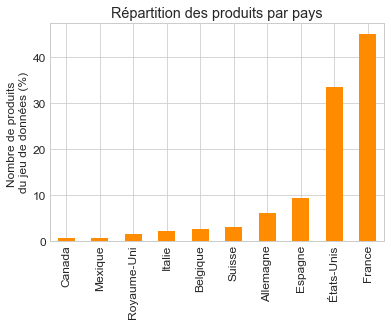

In [13]:
a = pd.Series(pays_list).value_counts(ascending=True).tail(10)*proportion
a.plot(kind='bar',
                                          color='darkorange',
                                          ylabel='Nombre de produits \ndu jeu de données (%)',
                                          title='Répartition des produits par pays');
pays_etude =  pd.Series(pays_list).value_counts(ascending=True).tail(10)

**Nutri-score**

In [14]:
print('{} % de nutriscore renseigné parmi tous les produits'.format(round(data['nutriscore_grade'].notna().sum()*proportion)))

93 % de nutriscore renseigné parmi tous les produits


In [15]:
data['nutriscore_grade'].value_counts().loc[['a','b','c','d','e']]

a     93139
b     69923
c    115084
d    169966
e    106530
Name: nutriscore_grade, dtype: int64

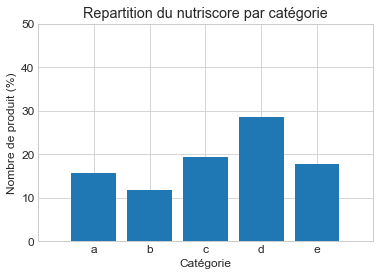

In [16]:
ind_x = ['a','b','c','d','e']
height_y = data['nutriscore_grade'].value_counts().loc[ind_x]

plt.bar(ind_x , height_y*proportion)
plt.title('Repartition du nutriscore par catégorie')
plt.xlabel('Catégorie')
plt.ylabel('Nombre de produit (%)');
plt.axis([-1,5,0,50]);

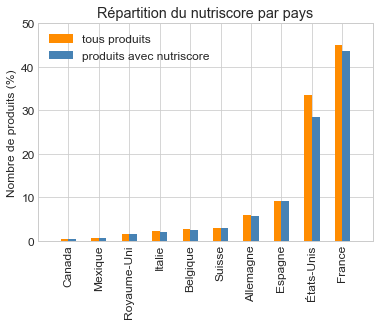

In [17]:
colonne_pays = []
for pays in pays_etude.index:
    masque_pays = data.countries_fr.str.contains(pays) == True
    colonne_pays.append( data[masque_pays]['nutriscore_grade'].notna().sum() )
    
pays_etude_nutriscore = pd.Series(colonne_pays,index=pays_etude.index)*proportion 

pd.DataFrame({'tous produits':a,'produits avec nutriscore':pays_etude_nutriscore}).plot(
    kind='bar',
    ylabel='Nombre de produits (%)',
    title='Répartition du nutriscore par pays',
    color=['darkorange','steelblue']
    );
plt.axis([-1,10,0,50]);

**Eco-score**

In [18]:
pct_renseigne = round(data['ecoscore_grade_fr'].notna().sum()*proportion)
print('{} % de l´ecoscore renseigné parmi tous les produits'.format(pct_renseigne))

58 % de l´ecoscore renseigné parmi tous les produits


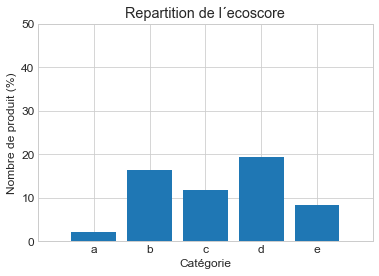

In [19]:
ind_x = ['a','b','c','d','e']
height_y = data['ecoscore_grade_fr'].value_counts().loc[ind_x]

plt.bar(ind_x, height_y*proportion)
plt.title('Repartition de l´ecoscore');
plt.xlabel('Catégorie')
plt.ylabel('Nombre de produit (%)');
plt.axis([-1,5,0,50]);

In [20]:
data['ecoscore_score_fr'].describe()

count    346912.000000
mean         46.594015
std          24.972630
min         -23.000000
25%          30.000000
50%          41.000000
75%          66.000000
max         125.000000
Name: ecoscore_score_fr, dtype: float64

**Nombre d´additifs:**

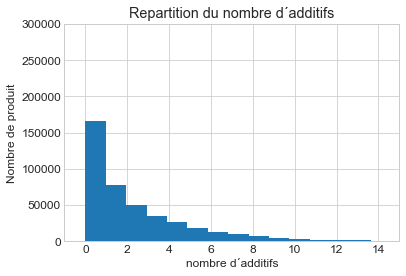

In [21]:
plt.hist(data['additives_n'].dropna(),bins=40);
plt.title('Repartition du nombre d´additifs')
plt.xlabel('nombre d´additifs')
plt.ylabel('Nombre de produit');
plt.axis([-1,15,0,300000]);

In [22]:
data['additives_n'].describe()

count    422073.000000
mean          2.148496
std           3.017572
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          39.000000
Name: additives_n, dtype: float64

In [23]:
data['additives_n'].quantile(0.8)

4.0

## Analyse multivariée

### Creation d´échantillons:

- Extraction d' un échantillon de nutri-score distribué normalement depuis les observations  
- Equilibrage de la catégorie 'Sugary snacks'

**Extraction d' un échantillon de nutri-score distribué normalement depuis les observations**

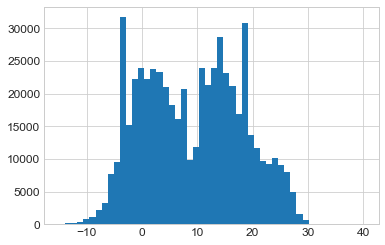

In [24]:
data['nutrition-score-fr_100g'].hist(bins=50);

In [25]:
data['nutrition-score-fr_100g'].describe()

count    554646.000000
mean          9.105819
std           9.005731
min         -15.000000
25%           1.000000
50%          10.000000
75%          16.000000
max          40.000000
Name: nutrition-score-fr_100g, dtype: float64

In [26]:
# On recupere les valeurs de l´histogramme hauteur et largeur des barres
counts,bins = np.histogram(data['nutrition-score-fr_100g'].dropna(),bins=50)

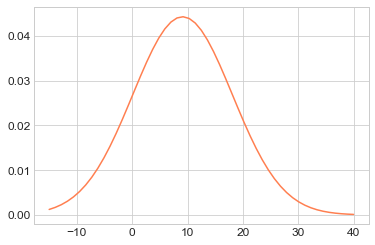

In [27]:
## Calcul des valeurs cibles : loi normale
## on veut que chaque hauteur apres traitement soit sur la loi normale

from scipy import stats
x_min = data['nutrition-score-fr_100g'].min()
x_max = data['nutrition-score-fr_100g'].max()

mean = data['nutrition-score-fr_100g'].mean() 
std = data['nutrition-score-fr_100g'].std()

x = bins ##np.linspace(x_min, x_max, 100)

y = stats.norm.pdf(x,mean,std)

plt.plot(x,y, color='coral');

In [28]:
## Calcul des poids pour obtenir cette loi normale
poids = y[:-1]/counts
## on affecte à chaque groupe 'bins' le poids correspondant 
data['ponderation_nutriscore'] = 1
for i,nutriscore in enumerate(bins):
    if i!=0:
        masque = (data['nutrition-score-fr_100g'] >= bins[i-1]) & (data['nutrition-score-fr_100g']< bins[i])
        data.loc[masque,'ponderation_nutriscore'] = y[i-1]/counts[i-1]

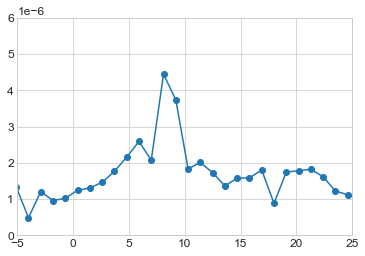

In [29]:
## courbe de ponderation
plt.plot(bins[:-1],y[:-1]/counts,'o-');
plt.axis([-5,25,0,0.6e-5]);

In [30]:
data_sample = data['nutrition-score-fr_100g'].sample(frac=0.3,weights=data['ponderation_nutriscore'])

<AxesSubplot:>

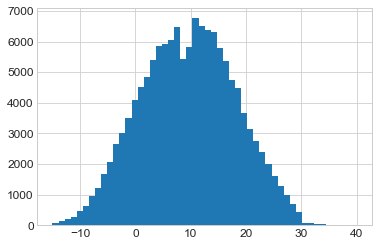

In [31]:
data_sample.hist(bins=50) ## echantillon nutriscore apres traitement

In [32]:
data_sample.describe()

count    136824.000000
mean          9.541330
std           8.549947
min         -15.000000
25%           3.000000
50%          10.000000
75%          15.000000
max          40.000000
Name: nutrition-score-fr_100g, dtype: float64

In [33]:
data_sample.shape

(179067,)

In [34]:
# echantillon apres traitement
data_sample_nutriscore = data.loc[data_sample.index,:]

In [35]:
data_sample_nutriscore.shape 

(179067, 46)

**Equilibrage de la catégorie 'Sugary snacks'**

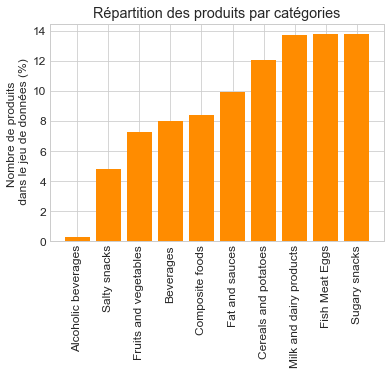

In [36]:
## pour reequilibrer la categorie 'Sugary snacks', 
## on echantillonne en passant d´une proportion de 22% a 14% du jeu de donnees
sous_ens = data[data['pnns_groups_1'].isin(['Sugary snacks'])].sample(frac=(1-14/22))
index_list = list(set(data.index)-set(sous_ens.index))

## echantillon equilibré
data_equilibre = data.iloc[index_list,:].copy()

var_categorie = data_equilibre["pnns_groups_1"].value_counts(ascending=True)*proportion
plt.bar(range(len(var_categorie)),var_categorie,color="darkorange")
plt.xticks(range(len((var_categorie))),var_categorie.index,rotation=90);
plt.title('Répartition des produits par catégories')
plt.ylabel('Nombre de produits \n dans le jeu de données (%)')
plt.rcParams.update({'font.size': 12})

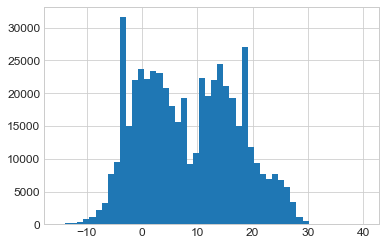

In [37]:
data_equilibre['nutrition-score-fr_100g'].hist(bins=50);

### Etude des effets des modalités nombre d'additifs sur le nutriscore:

**Anova nombre d´additifs (qualitative) vs nutriscore (quantitative)**

In [38]:
def creation_df_anova(data):
    """
    Retourne un dataframe df en fonction du jeu de donnee data en entree
    creation d une colonne regroupant par categorie les nombres d' additifs
    """
    
    df = pd.DataFrame(data[['additives_n','nutrition-score-fr_100g','pnns_groups_2','nutriscore_grade']].copy())

    ## Creations de groupe d´additif
    ## A: 0 additif
    ## B: 1 à 5 additifs
    ## C: 6+ additifs 

    ind_additifs = ["A","B","C"]
    ind_bins = [-1,0,6,40]
    df['groupe_additifs'] = pd.cut(data['additives_n'],bins = ind_bins, labels = ind_additifs)
    
    return df

**Jeu de donnees initial**

In [39]:
df = creation_df_anova(data)

In [40]:
grp = df.groupby('groupe_additifs')['nutrition-score-fr_100g']
df_grp = pd.concat([grp.mean(),grp.std(),grp.var(),grp.var()/grp.mean()],axis=1)
df_grp.columns = ['moyenne','ecart type','variance','variance/moyenne']
print(df_grp)

                   moyenne  ecart type   variance  variance/moyenne
groupe_additifs                                                    
A                 5.307360    8.831483  77.995083         14.695647
B                10.817091    8.817838  77.754262          7.188093
C                13.750650    7.565399  57.235264          4.162368


groupe_additifs
A    153025
B    201070
C     30407
dtype: int64


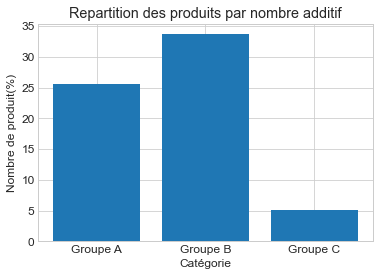

In [41]:
ind_x = ['Groupe A','Groupe B','Groupe C']
height_y = df.dropna().groupby('groupe_additifs').apply(len)

plt.bar(ind_x, height_y*proportion)
plt.title('Repartition des produits par nombre additif');
plt.xlabel('Catégorie')
plt.ylabel('Nombre de produit(%)');
print(height_y)

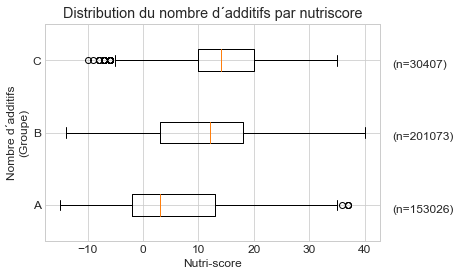

In [42]:
# Graphique boxplot: nutriscore par groupe d´additifs
ind_additifs = ["A","B","C"]
nutriscore_liste = []
for additif in ind_additifs:
    nutriscore_liste.append(df['nutrition-score-fr_100g'][df['groupe_additifs'].isin([additif])].dropna().to_list())
    
## graphique
plt.boxplot(nutriscore_liste,labels=ind_additifs,vert=False)
plt.title('Distribution du nombre d´additifs par nutriscore')
plt.xlabel('Nutri-score')
plt.ylabel('Nombre d´additifs\n(Groupe)')

## ajout du nombre d´effectifs
for i,nutriscore in enumerate(ind_additifs):
    texte = '(n={})'.format( len(nutriscore_liste[i]) )
    plt.text(45,i+0.9,texte)

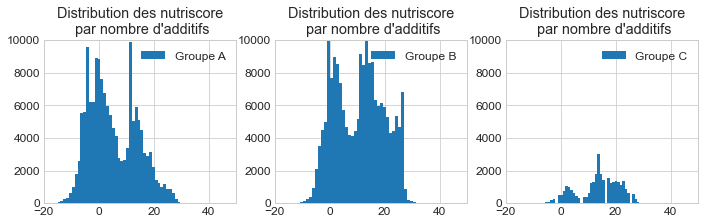

In [43]:
## Histogramme
fig = plt.figure(figsize=(20,3)) 
for i,additifs in enumerate(ind_additifs):
    fig.add_subplot(1,5,i+1)
    plt.hist(nutriscore_liste[i],label='Groupe '+additifs, bins=50)
    plt.legend()
    plt.title("Distribution des nutriscore\n par nombre d'additifs")
    plt.axis([-20,50,0,10000])

In [44]:
groupe_additifs = df.dropna().groupby('groupe_additifs')['nutrition-score-fr_100g']

**Statistique avec stats.f_oneway (scipy)**

In [45]:
from scipy import stats
stats.f_oneway(groupe_additifs.get_group('A'),
               groupe_additifs.get_group('B'),
               groupe_additifs.get_group('C'))

F_onewayResult(statistic=22490.075445422557, pvalue=0.0)

In [46]:
stats.kruskal(groupe_additifs.get_group('A'),groupe_additifs.get_group('B'),groupe_additifs.get_group('C'))

KruskalResult(statistic=40536.31035555731, pvalue=0.0)

In [47]:
def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT

In [48]:
x_nom = 'groupe_additifs'
y_nom = 'nutrition-score-fr_100g'
df_eta = df.copy()
sous_echantillon = df[x_nom].notna() & df[y_nom].notna() 
eta2 = eta_squared(df[sous_echantillon][x_nom],df[sous_echantillon][y_nom])
print('eta_squared = {}'.format(eta2))

eta_squared = 0.10473335710013361


**Meme exercice avec statsmodels: on arrive au même resultat**

In [49]:
df['nutrition_score_fr_100g'] = df['nutrition-score-fr_100g']

In [50]:
data_mdl = pd.DataFrame(df.dropna()[['nutrition_score_fr_100g','groupe_additifs']].copy())

import statsmodels.api as sm
from statsmodels.formula.api import ols

mod = ols('nutrition_score_fr_100g ~ groupe_additifs',
                data=data_mdl).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                       sum_sq        df             F  PR(>F)
groupe_additifs  3.428727e+06       2.0  22490.075445     0.0
Residual         2.930942e+07  384499.0           NaN     NaN


In [51]:
esq_sm = aov_table['sum_sq'][0]/(aov_table['sum_sq'][0]+aov_table['sum_sq'][1])
print(esq_sm)

0.1047318613663689


**Jeu de donnee avec une proportion de sugary snacks moindre**

In [52]:
df_equilibre =  creation_df_anova(data_equilibre)

In [53]:
groupe_additifs = df_equilibre.dropna().groupby('groupe_additifs')['nutrition-score-fr_100g']
stats.f_oneway(groupe_additifs.get_group('A'),groupe_additifs.get_group('B'),groupe_additifs.get_group('C'))

F_onewayResult(statistic=18251.86452264511, pvalue=0.0)

In [54]:
stats.kruskal(groupe_additifs.get_group('A'),groupe_additifs.get_group('B'),groupe_additifs.get_group('C'))

KruskalResult(statistic=33635.47715097005, pvalue=0.0)

In [55]:
x_nom = 'groupe_additifs'
y_nom = 'nutrition-score-fr_100g'
df_eta = df_equilibre.copy()
sous_echantillon = df_eta[x_nom].notna() & df_eta[y_nom].notna() 
eta2 = eta_squared(df_eta[sous_echantillon][x_nom],df_eta[sous_echantillon][y_nom])
print('eta_squared = {}'.format(eta2))

eta_squared = 0.09373451214297156


**Jeu de donnee avec un echantillon distribué normalement du nutriscore**

In [56]:
df_sample =  creation_df_anova(data_sample_nutriscore)

In [57]:
groupe_additifs = df_sample.dropna().groupby('groupe_additifs')['nutrition-score-fr_100g']
stats.f_oneway(groupe_additifs.get_group('A'),groupe_additifs.get_group('B'),groupe_additifs.get_group('C'))

F_onewayResult(statistic=5503.736487186865, pvalue=0.0)

In [58]:
x_nom = 'groupe_additifs'
y_nom = 'nutrition-score-fr_100g'
df_eta = df_sample.copy()
sous_echantillon = df_eta[x_nom].notna() & df_eta[y_nom].notna() 
eta2 = eta_squared(df_eta[sous_echantillon][x_nom],df_eta[sous_echantillon][y_nom])
print('eta_squared = {}'.format(eta2))

eta_squared = 0.10390225203655276


**Etude spécifique à la catégorie 'one-dish meals'**

In [59]:
masque = df['pnns_groups_2'] == 'One-dish meals'

In [60]:
groupe_additifs_pnns = df[masque].dropna().groupby('groupe_additifs')['nutrition-score-fr_100g']

In [61]:
stats.f_oneway(groupe_additifs_pnns.get_group('A'),
               groupe_additifs_pnns.get_group('B'),
               groupe_additifs_pnns.get_group('C'))

F_onewayResult(statistic=740.9487478959375, pvalue=2.26260163e-314)

In [62]:
x_nom = 'groupe_additifs'
y_nom = 'nutrition-score-fr_100g'
df_eta = df[masque].copy()
sous_echantillon = df_eta[x_nom].notna() & df_eta[y_nom].notna() 
eta2 = eta_squared(df_eta[sous_echantillon][x_nom],df_eta[sous_echantillon][y_nom])
print('eta_squared = {}'.format(eta2))

eta_squared = 0.049773371772139925


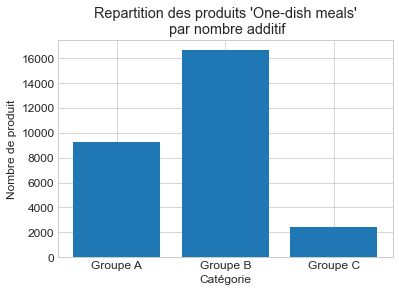

In [63]:
ind_x = ['Groupe A','Groupe B','Groupe C']
height_y = df[masque].dropna().groupby('groupe_additifs').apply(len)

plt.bar(ind_x, height_y)
plt.title('Repartition des produits \'One-dish meals\'\n par nombre additif');
plt.xlabel('Catégorie')
plt.ylabel('Nombre de produit');
##print(height_y)

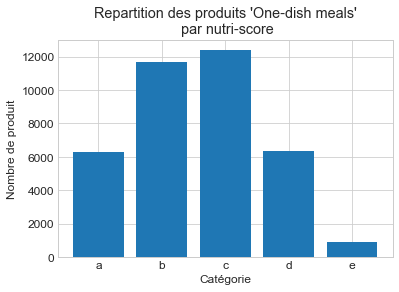

In [64]:
height_y = df[masque]['nutriscore_grade'].value_counts()
plt.bar(sorted(height_y.index), height_y.loc[sorted(height_y.index)])
plt.title('Repartition des produits \'One-dish meals\'\n par nutri-score');
plt.xlabel('Catégorie')
plt.ylabel('Nombre de produit');
##print(height_y)

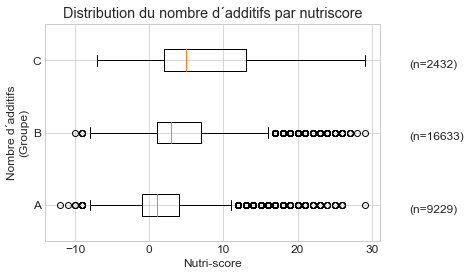

In [65]:
# Graphique boxplot: nutriscore par groupe d´additifs
ind_additifs = ["A","B","C"]
nutriscore_liste = []
for additif in ind_additifs:
    nutriscore_liste.append(df[masque]['nutrition-score-fr_100g'][df[masque]['groupe_additifs'].isin([additif])].dropna().to_list())
    
## graphique
plt.boxplot(nutriscore_liste,labels=ind_additifs,vert=False)
plt.title('Distribution du nombre d´additifs par nutriscore')
plt.xlabel('Nutri-score')
plt.ylabel('Nombre d´additifs\n(Groupe)')

## ajout du nombre d´effectifs
for i,nutriscore in enumerate(ind_additifs):
    texte = '(n={})'.format( len(nutriscore_liste[i]) )
    plt.text(35,i+0.9,texte)
    
##df[masque].boxplot('nutrition-score-fr_100g',by='groupe_additifs',vert=False);

### Relation entre nutriscore, nombre d´additifs et categorie pnns_1
**Table de contingence, chi2 et p value, heatmap**

In [66]:
from scipy.stats import chi2_contingency
def bi_varie_heatmap(cont,n_center):
    tx = cont.loc[:,["Total"]]
    ty = cont.loc[["Total"],:]
    n = len(data)
    indep = tx.dot(ty) / n

    c = cont.fillna(0) # On remplace les valeurs nulles par 0
    measure = (c-indep)**2/indep
    xi_n = measure.sum().sum()
    table = measure/xi_n
    sns.heatmap(table.iloc[:-1,:-1],center=n_center,linewidths=.5)##,annot=c.iloc[:-1,:-1])
    plt.show()
    
    [chi2, p, dof, ex]=chi2_contingency(cont,correction=False) 
    print('chi2={} p={}'.format(chi2,p))
    
    return


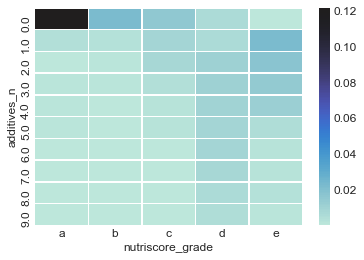

chi2=40300.22715258081 p=0.0


nutriscore_grade,a,b,c,d,e,Total
additives_n,,,,,,
0.0,48278,23049,29864,35410,16424,153025
1.0,12431,8853,14732,18691,17516,72223
2.0,4531,5348,9799,14004,11681,45363
3.0,2180,3813,6441,10689,8565,31688
4.0,1472,2676,4684,8333,6649,23814
5.0,1031,1862,3336,6294,4051,16574
6.0,696,1206,2116,4758,2632,11408
7.0,496,831,1314,3621,1929,8191
8.0,264,481,929,2729,1769,6172


In [67]:
X = "additives_n"
Y = "nutriscore_grade"
cont = data.loc[data[X].isin(range(10)),[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
bi_varie_heatmap(cont,0.12)
cont

In [68]:
X = "additives_n"
Y = "nutriscore_grade"
cont = data.loc[data[X].isin(range(11)),[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len)
# bi_varie_heatmap(cont,0.12)
# cont

[chi2, p, dof, ex]=chi2_contingency(cont,correction=False) 
print('chi2={} p={}'.format(chi2,p))


chi2=41406.0083627897 p=0.0


In [69]:
cont

nutriscore_grade,a,b,c,d,e
additives_n,,,,,
0.0,48278,23049,29864,35410,16424
1.0,12431,8853,14732,18691,17516
2.0,4531,5348,9799,14004,11681
3.0,2180,3813,6441,10689,8565
4.0,1472,2676,4684,8333,6649
5.0,1031,1862,3336,6294,4051
6.0,696,1206,2116,4758,2632
7.0,496,831,1314,3621,1929
8.0,264,481,929,2729,1769


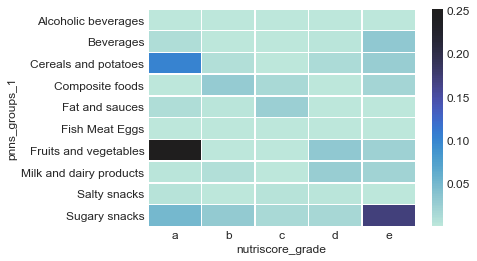

chi2=289602.2869973214 p=0.0


nutriscore_grade,a,b,c,d,e,Total
pnns_groups_1,,,,,,
Alcoholic beverages,0.0,1.0,7.0,6.0,7.0,21
Beverages,1044.0,4386.0,8223.0,6928.0,14217.0,34798
Cereals and potatoes,29972.0,13312.0,14019.0,10921.0,2048.0,70272
Composite foods,6657.0,13060.0,16145.0,11587.0,1436.0,48885
Fat and sauces,2593.0,3666.0,18778.0,17494.0,8888.0,51419
Fish Meat Eggs,11474.0,11138.0,15589.0,26563.0,15296.0,80060
Fruits and vegetables,29765.0,4919.0,6598.0,860.0,88.0,42230
Milk and dairy products,8881.0,14907.0,15514.0,37269.0,4535.0,81106
Salty snacks,1637.0,2281.0,8182.0,11239.0,5009.0,28348


In [70]:
X = "pnns_groups_1"
Y = "nutriscore_grade"
cont = data[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
cont.iloc[0,0]=0
bi_varie_heatmap(cont,0.25)
cont

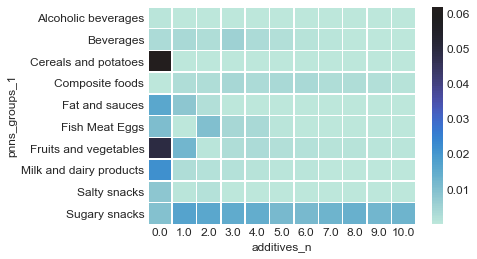

chi2=52855.69677821571 p=0.0


additives_n,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,Total
pnns_groups_1,,,,,,,,,,,,
Alcoholic beverages,578,226,85,66,41,56,33,29,13,9,2,1138
Beverages,14345,7582,5021,4408,3053,2178,1403,1020,627,339,145,40121
Cereals and potatoes,31671,7645,4114,2793,2106,1801,1209,818,663,432,318,53570
Composite foods,10873,6564,4540,3744,2871,2213,1700,1253,1030,746,494,36028
Fat and sauces,19478,9265,5155,3038,2078,1320,950,607,402,212,137,42642
Fish Meat Eggs,18502,6382,7037,4453,3445,1967,979,532,359,219,145,44020
Fruits and vegetables,20126,8059,1921,605,221,155,115,42,23,18,12,31297
Milk and dairy products,25457,9516,6103,4542,3322,2386,1680,1122,631,369,204,55332
Salty snacks,8213,2829,2252,1349,1012,614,347,203,150,76,49,17094


In [71]:
X = "pnns_groups_1"
Y = "additives_n"

cont = data.loc[data[Y].isin(range(11)),[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
bi_varie_heatmap(cont,0.06)
cont

  
 ### Construction d´un score

In [72]:
data['nutrition-score-fr_100g'].describe()

count    554646.000000
mean          9.105819
std           9.005731
min         -15.000000
25%           1.000000
50%          10.000000
75%          16.000000
max          40.000000
Name: nutrition-score-fr_100g, dtype: float64

**Score à 60% nutriscore et 40% nombre d´additifs**  
 Un score proche de zero indique un produit favorable a la santé

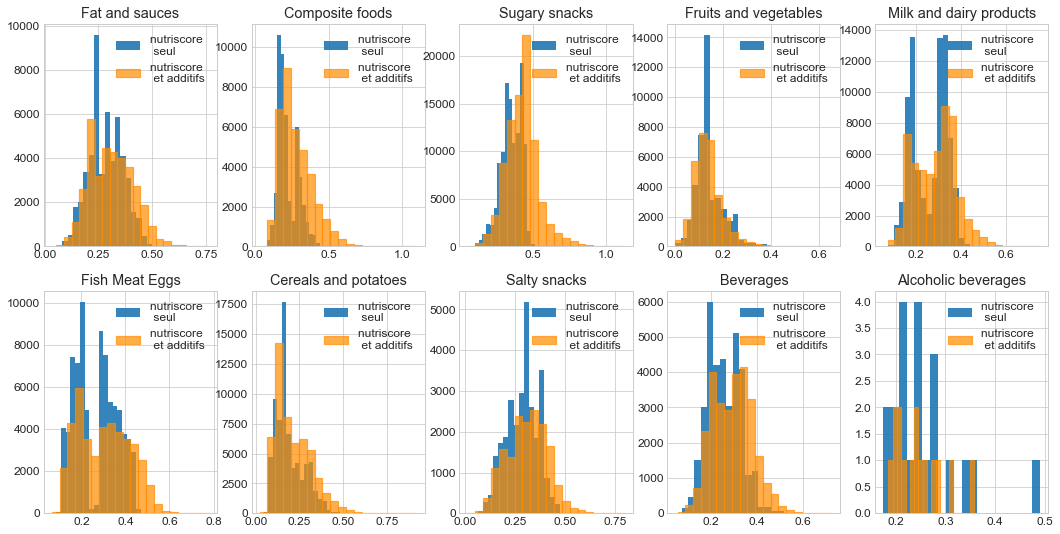

In [73]:
fig = plt.figure(figsize=(18,9)) 
score = data[['nutrition-score-fr_100g']].copy()

for i,categorie in enumerate(data['pnns_groups_1'].dropna().unique()):
   
    fig.add_subplot(2,5,i+1)
    score['nutriscore_traite'] = 0.6*(score['nutrition-score-fr_100g']+15)/55
    score['nutriscore_additif'] = score['nutriscore_traite'] + 0.4*(data.loc[data['pnns_groups_1']==categorie,'additives_n']/20)
          
    plt.hist(score.loc[data['pnns_groups_1']==categorie,'nutriscore_traite'],
             bins=20,alpha=0.9,label="nutriscore \n seul")
    plt.hist(score.loc[data['pnns_groups_1']==categorie,'nutriscore_additif'],bins=20,
             color='darkorange',alpha=0.7,edgecolor='darkorange',linewidth=1.2,label="nutriscore \n et additifs")
    plt.title(categorie)
    ##plt.axis([-15, 40,0, 35000])
    plt.legend()

Les produits avec beaucoup d´additifs affichent un score moins favorable a la santé.  

- Categorie 'Milk and dairy product', 'Fish meat eggs' : distribution avec deux pics.  
La différence peut s´expliquer entre produits bruts et transformes (ex: viande/charcuterie, yaourt/creme dessert)  
- Categorie 'composite food' distribution avec deux pics aussi, beaucoup de plats avec nutriscore b.  


La prise en compte des additifs dégrade le score et attenue les pics ('salty/sugary snacks', 'composite food'). Les fruits et legumes,et les produits cerealiers sont toujours très bien placés.

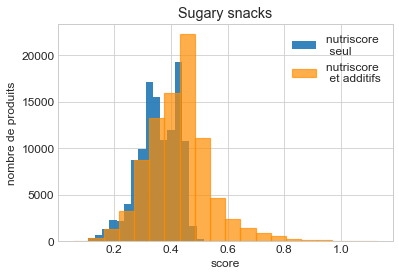

In [74]:
categorie ='Sugary snacks'
score['nutriscore_traite'] = 0.6*(score['nutrition-score-fr_100g']+15)/55
score['nutriscore_additif'] = score['nutriscore_traite'] + 0.4*(data.loc[data['pnns_groups_1']==categorie,'additives_n']/20)

plt.hist(score.loc[data['pnns_groups_1']==categorie,'nutriscore_traite'],
         bins=20,alpha=0.9,label="nutriscore \n seul")
plt.hist(score.loc[data['pnns_groups_1']==categorie,'nutriscore_additif'],bins=20,
         color='darkorange',alpha=0.7,edgecolor='darkorange',linewidth=1.2,label="nutriscore \n et additifs")
plt.title(categorie)
plt.xlabel('score')
plt.ylabel('nombre de produits')
plt.legend();

**Meme exercice avec 10% ecoscore + 90% nutriscore**

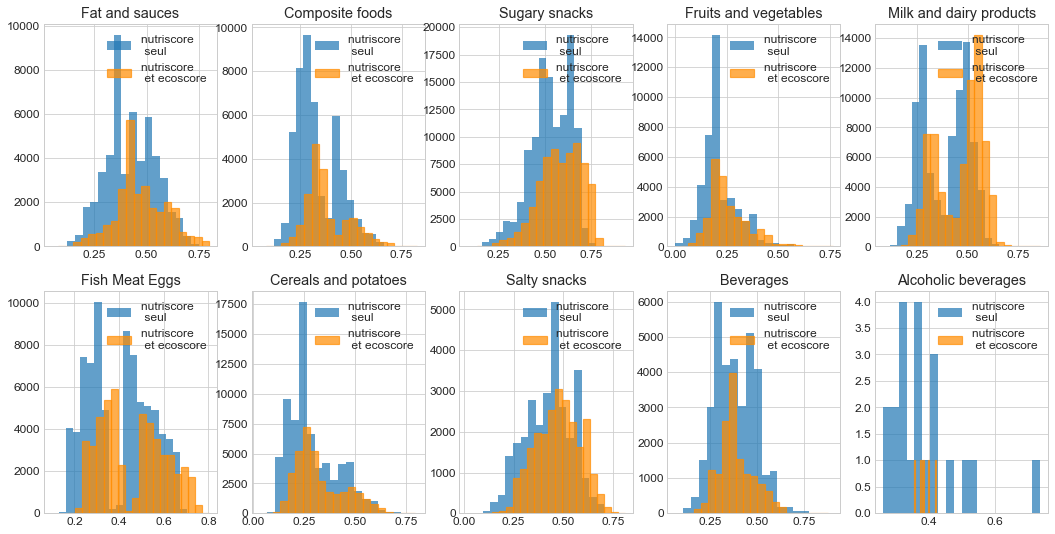

In [75]:
fig = plt.figure(figsize=(18,9)) 
score = data[['nutrition-score-fr_100g']].copy()

for i,categorie in enumerate(data['pnns_groups_1'].dropna().unique()):
   
    fig.add_subplot(2,5,i+1)
    score['nutriscore_traite'] = 0.9*(score['nutrition-score-fr_100g']+15)/55
    ecoscore = 1-(23+data.loc[ data['pnns_groups_1']==categorie ,'ecoscore_score_fr'])/148
    
    score['nutriscore_ecoscore'] = score['nutriscore_traite'] + 0.1*(ecoscore)
          
    plt.hist(score.loc[data['pnns_groups_1']==categorie,'nutriscore_traite'],
             bins=20,alpha=0.7,label="nutriscore \n seul")
    plt.hist(score.loc[data['pnns_groups_1']==categorie,'nutriscore_ecoscore'],bins=20,
             color='darkorange',alpha=0.7,edgecolor='darkorange',linewidth=1.2,label="nutriscore \n et ecoscore")
    plt.title(categorie)
    ##plt.axis([-15, 40,0, 35000])
    plt.legend()